In [42]:
import random
import torch
from d2l import torch as d2l


In [43]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    # 生成X，y，加上噪声
    # x的维s度是num_examples * len(w) y的维度是num_examples * 1
    # y=Xw+b+noise
    X = torch.normal(0, 1, (num_examples, len(w)))  # 生成X
    y = torch.matmul(X, w) + b  # 生成y
    y += torch.normal(0, 0.01, y.shape)  # 加上噪声
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2                                         
features,labels=synthetic_data(true_w,true_b,1000)

In [44]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([-1.9424, -0.2921]) 
label: tensor([1.3113])


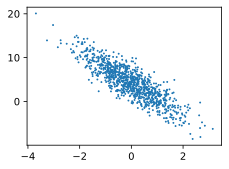

In [45]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [46]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.3896,  1.2105],
        [-0.4666,  0.2020],
        [ 0.0350,  0.7023],
        [-0.0411, -0.0686],
        [ 1.5242, -0.1589],
        [ 2.0037, -0.5672],
        [-1.2196,  0.1791],
        [-1.7059, -0.3599],
        [ 0.8957,  1.3603],
        [ 0.7778,  0.8312]]) 
 tensor([[-2.6880],
        [ 2.5696],
        [ 1.8988],
        [ 4.3501],
        [ 7.8034],
        [10.1336],
        [ 1.1620],
        [ 2.0196],
        [ 1.3557],
        [ 2.9452]])


In [47]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

In [48]:
def linreg(X,w,b):
    #线性回归模型
    return torch.matmul(X,w)+b

In [49]:
def squared_loss(y_hat,y):
    #均方损失
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [50]:
def sgd(params,lr,batch_size):
    #小批量梯度下降
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

In [53]:
lr=0.001
num_epochs=1000
net=linreg
loss=squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')


epoch1,loss1.789238
epoch2,loss1.458925
epoch3,loss1.189620
epoch4,loss0.970047
epoch5,loss0.791014
epoch6,loss0.645041
epoch7,loss0.526018
epoch8,loss0.428965
epoch9,loss0.349828
epoch10,loss0.285298
epoch11,loss0.232679
epoch12,loss0.189768
epoch13,loss0.154777
epoch14,loss0.126241
epoch15,loss0.102969
epoch16,loss0.083991
epoch17,loss0.068514
epoch18,loss0.055891
epoch19,loss0.045597
epoch20,loss0.037201
epoch21,loss0.030353
epoch22,loss0.024768
epoch23,loss0.020212
epoch24,loss0.016497
epoch25,loss0.013466
epoch26,loss0.010994
epoch27,loss0.008977
epoch28,loss0.007332
epoch29,loss0.005991
epoch30,loss0.004897
epoch31,loss0.004004
epoch32,loss0.003275
epoch33,loss0.002681
epoch34,loss0.002197
epoch35,loss0.001801
epoch36,loss0.001478
epoch37,loss0.001215
epoch38,loss0.001001
epoch39,loss0.000825
epoch40,loss0.000682
epoch41,loss0.000566
epoch42,loss0.000471
epoch43,loss0.000393
epoch44,loss0.000330
epoch45,loss0.000278
epoch46,loss0.000236
epoch47,loss0.000202
epoch48,loss0.000173
e

In [54]:
print(true_b-b)
print(true_w-w.reshape(true_w.shape))

tensor([-0.0001], grad_fn=<RsubBackward1>)
tensor([-0.0002, -0.0002], grad_fn=<SubBackward0>)
